In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 146MB/s]
100% 1.06G/1.06G [00:05<00:00, 205MB/s]


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization, Dropout

In [5]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/train', # Assuming the unzipped data is in this directory
     labels='inferred',
     label_mode = 'int',
     batch_size=32,
     image_size=(256,256),
     )


test_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/test', # Assuming the unzipped data is in this directory
     labels='inferred',
     label_mode = 'int',
     batch_size=32,
     image_size=(256,256),
     )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalization
def normal(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

In [20]:
from keras.layers import Input

# create a CNN model
model = Sequential([
    Input(shape=(256,256,3)),
    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 5.6453e-04 - loss: 15.1500 - val_accuracy: 0.0020 - val_loss: 12.7854
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.0033 - loss: 12.0021 - val_accuracy: 0.0012 - val_loss: 7.8761
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.0031 - loss: 7.5551 - val_accuracy: 0.0058 - val_loss: 7.4517
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.0034 - loss: 7.3673 - val_accuracy: 0.0044 - val_loss: 7.3058
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.0065 - loss: 7.2890 - val_accuracy: 0.0062 - val_loss: 7.3349
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.0066 - loss: 7.2395 - val_accuracy: 0.0072 - val_loss: 7.2523
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.0070 - loss: 7.1960 - val_accuracy: 0.0032 - val_loss: 7.5402
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.0054 - loss: 7.

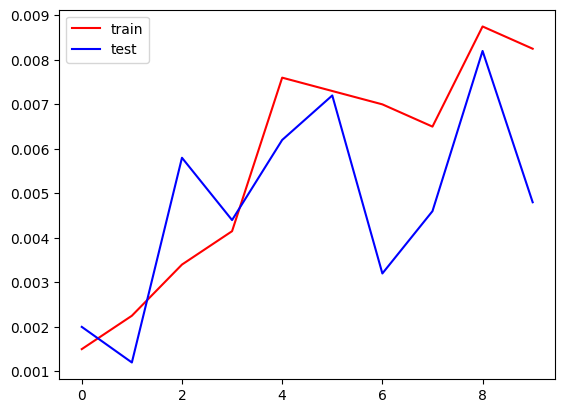

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

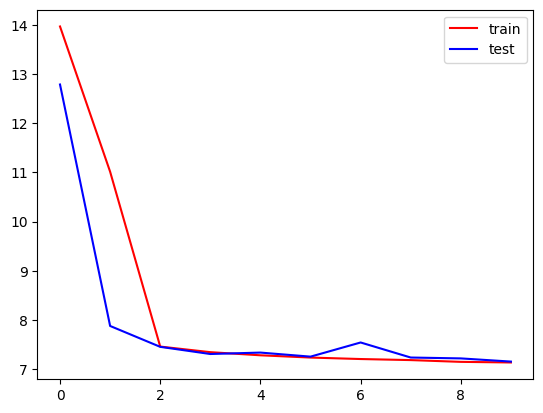

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [22]:
import cv2

In [53]:
test_img = cv2.imread('/content/dog.jpg')

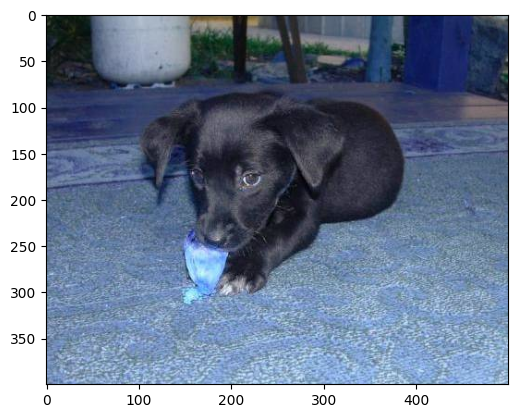

In [54]:
plt.imshow(test_img)

(400, 500, 3)

In [56]:
test_img = cv2.resize(test_img,(256,256))

In [57]:
test_img = test_img.reshape((1,256,256,3))

In [58]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[3.2930348e-17]], dtype=float32)

In [119]:
test_img = cv2.imread('/content/cat.jpg')

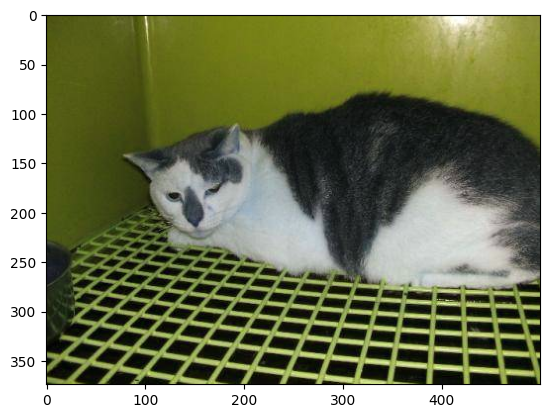

In [120]:
plt.imshow(test_img)

In [121]:
test_img.shape

(374, 500, 3)

In [136]:
test_image = cv2.resize(test_img,(256,256))

In [137]:
test_image=test_image.reshape((1,256,256,3))

In [138]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[3.1997249e-19]], dtype=float32)